<a href="https://colab.research.google.com/github/infocornouaille/premiere_nsi/blob/main/nasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python matplotlib et visualisation de datas (.csv)

## Import des modules

Import de :
- pandas pour traiter les données
- numpy pour faire quelques calculs
- matplotlib pour faire des graphiques
- scipy pour les droites de régression linéraire.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

Cet import n'est nécessaire que dans Google Colab: c'est pour enregistrer les images matplotlib

In [2]:
from google.colab import files


## Récupérer les données sur le site de la NASA


On trouve plein de datas sur le site de la NASA.

Le lien: https://data.giss.nasa.gov/gistemp/


Quelques url sont mises dans des variables:
- `url_global` : Global-mean monthly, seasonal, and annual means
- `url_nord` : Northern Hemisphere-mean monthly, seasonal, and annual means
- `url_sud` : Southern Hemisphere-mean monthly, seasonal, and annual means

In [3]:
url_global = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
url_nord = "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv"
url_sud = "https://data.giss.nasa.gov/gistemp/tabledata_v4/SH.Ts+dSST.csv"

## Lecture des données par pandas

Parfois les csv de la NASA comportent une ou plusieurs lignes de commentaires. Nous devons donc les examiner un par un.

Test pour le global

In [4]:
df = pd.read_csv(url_global)
df.head()

,,,,,,,,,,,,,,,,,,Land-Ocean: Global Means
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1880,-.18,-.24,-.08,-.15,-.09,-.20,-.17,-.09,-.14,-.22,-.20,-.17,-.16,***,***,-.11,-.16,-.19
1881,-.19,-.13,.04,.06,.08,-.18,.01,-.03,-.15,-.21,-.17,-.06,-.08,-.09,-.16,.06,-.06,-.18
1882,.17,.14,.05,-.15,-.13,-.21,-.16,-.07,-.14,-.23,-.16,-.35,-.10,-.08,.08,-.08,-.14,-.17
1883,-.28,-.36,-.12,-.18,-.17,-.06,-.07,-.13,-.21,-.11,-.24,-.11,-.17,-.19,-.33,-.15,-.09,-.19


Le csv global comporte une ligne de commentaire, d'où le paramère `skiprows=1`

In [5]:
df_global = pd.read_csv(url_global, skiprows=1)
df_global.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.14,-.22,-.20,-.17,-.16,***,***,-0.11,-0.16,-.19
1,1881,-0.19,-0.13,0.04,0.06,0.08,-0.18,0.01,-0.03,-0.15,-.21,-.17,-.06,-.08,-.09,-.16,0.06,-0.06,-.18
2,1882,0.17,0.14,0.05,-0.15,-0.13,-0.21,-0.16,-0.07,-0.14,-.23,-.16,-.35,-.10,-.08,.08,-0.08,-0.14,-.17
3,1883,-0.28,-0.36,-0.12,-0.18,-0.17,-0.06,-0.07,-0.13,-0.21,-.11,-.24,-.11,-.17,-.19,-.33,-0.15,-0.09,-.19
4,1884,-0.12,-0.08,-0.36,-0.39,-0.33,-0.34,-0.30,-0.27,-0.27,-.24,-.33,-.30,-.28,-.26,-.10,-0.36,-0.31,-.28


Test pour l'hémisphère nord

In [6]:
df = pd.read_csv(url_nord)
df.head()

,,,,,,,,,,,,,,,,,,Land-Ocean: Northern Hemispheric Means
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1880,-.35,-.50,-.22,-.28,-.05,-.15,-.17,-.24,-.21,-.30,-.40,-.39,-.27,***,***,-.18,-.18,-.30
1881,-.29,-.20,-.02,.02,.06,-.31,.10,-.03,-.25,-.42,-.35,-.22,-.16,-.17,-.29,.02,-.08,-.34
1882,.27,.22,.04,-.29,-.22,-.27,-.26,-.13,-.23,-.50,-.32,-.67,-.20,-.16,.09,-.16,-.22,-.35
1883,-.56,-.65,-.14,-.28,-.24,-.10,-.04,-.21,-.32,-.15,-.43,-.14,-.27,-.32,-.63,-.22,-.12,-.30


Le csv pour l'hémisphère Nord comporte une ligne de commentaire, d'où le paramère `skiprows=1`

In [7]:
df_nord = pd.read_csv(url_nord, skiprows=1)
df_nord.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.35,-0.50,-0.22,-0.28,-0.05,-0.15,-0.17,-0.24,-0.21,-.30,-.40,-.39,-.27,***,***,-0.18,-0.18,-.30
1,1881,-0.29,-0.20,-0.02,0.02,0.06,-0.31,0.10,-0.03,-0.25,-.42,-.35,-.22,-.16,-.17,-.29,0.02,-0.08,-.34
2,1882,0.27,0.22,0.04,-0.29,-0.22,-0.27,-0.26,-0.13,-0.23,-.50,-.32,-.67,-.20,-.16,.09,-0.16,-0.22,-.35
3,1883,-0.56,-0.65,-0.14,-0.28,-0.24,-0.10,-0.04,-0.21,-0.32,-.15,-.43,-.14,-.27,-.32,-.63,-0.22,-0.12,-.30
4,1884,-0.15,-0.10,-0.63,-0.58,-0.35,-0.40,-0.40,-0.50,-0.44,-.43,-.56,-.46,-.42,-.39,-.13,-0.52,-0.43,-.48


Test pour l'hémisphère Sud

In [8]:
df = pd.read_csv(url_sud)
df.head()

,,,,,,,,,,,,,,,,,,Land-Ocean: Southern Hemispheric Means
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1880,.00,.03,.05,-.02,-.13,-.25,-.18,.06,-.06,-.15,-.01,.05,-.05,***,***,-.03,-.12,-.07
1881,-.09,-.07,.09,.09,.08,-.06,-.08,-.03,-.05,-.01,-.01,.09,.00,-.01,-.04,.09,-.06,-.02
1882,.06,.07,.07,-.02,-.04,-.16,-.05,.00,-.05,.03,-.01,-.08,-.01,.00,.07,.00,-.07,-.01
1883,-.02,-.08,-.09,-.08,-.10,-.03,-.09,-.06,-.11,-.06,-.04,-.06,-.07,-.07,-.06,-.09,-.06,-.07


Là on va être embêté: le nommage des colonnes n'est pas le même !

Pour faire simple on va mettre un booléen à Vrai si on analyse le Sud, et Faux sinon.

In [9]:
df_sud = pd.read_csv(url_sud, skiprows=1)
df_sud.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,0.00,0.03,0.05,-0.02,-0.13,-0.25,-0.18,0.06,-0.06,-.15,-.01,.05,-.05,***,***,-0.03,-0.12,-.07
1,1881,-0.09,-0.07,0.09,0.09,0.08,-0.06,-0.08,-0.03,-0.05,-.01,-.01,.09,.00,-.01,-.04,0.09,-0.06,-.02
2,1882,0.06,0.07,0.07,-0.02,-0.04,-0.16,-0.05,0.00,-0.05,.03,-.01,-.08,-.01,.00,.07,0.00,-0.07,-.01
3,1883,-0.02,-0.08,-0.09,-0.08,-0.10,-0.03,-0.09,-0.06,-0.11,-.06,-.04,-.06,-.07,-.07,-.06,-0.09,-0.06,-.07
4,1884,-0.09,-0.06,-0.10,-0.22,-0.32,-0.30,-0.22,-0.07,-0.12,-.07,-.10,-.15,-.15,-.14,-.07,-0.21,-0.20,-.10


Choix des données pour le reste:

In [10]:
df = df_sud

In [11]:
df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [12]:
df.iloc[0,:][0]

1880

## Nettoyage des données

Comme toujours, il faut nettoyer un peu les données avant de pouvoir les traiter.

1. **données manquantes**: dans les csv de la NASA, les données manquantes sont indiquées par "***". C'est normal qu'il y en ait ! Par exemple en octobre 2022, les données de novembre 2022 sont manquantes (heureusement 😉). On va donc les passer à `Nan` (mot clé pour dire "rien")
2. **numérique**: par défaut les données sont des chaînes de caractères. Nous allons devoir les transformer en données numériques pour pouvoir travailler dessus.

C'est le rôle de la boucle qui suit, qui fait les deux traitements en même temps

In [13]:
for column in df.columns:
  df.loc[df[column] == "***", column] = np.nan
  df[column] = pd.to_numeric(df[column])
  

## Quelques graphiques simples

On peut vouloir afficher les températures sur le mois de février

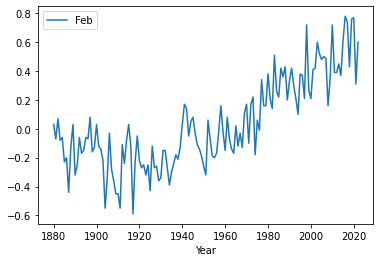

In [38]:
df.plot(x='Year', y="Feb")
plt.savefig("Feb.png")

On peut vouloir afficher les températures sur le mois de février, mais sur les 8 denières années par exemple

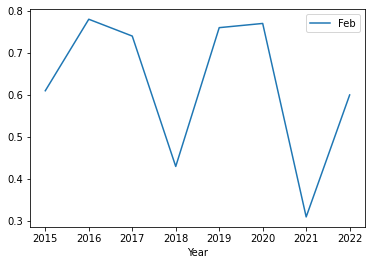

In [39]:
df[-8:].plot(x='Year', y="Feb")
plt.savefig("Feb-8.png")


On pourrait vouloir TOUS les graphiques 😎

Une petite fonction va nous aider.

In [16]:
list(df.columns)[0]

'Year'

In [17]:
def all_graphics(df):
  dataframes = []
  X = df['Year']
  columns = list(df.columns)
  for column in columns[1:]: # On ne prend pas l'année
    df_temp = pd.DataFrame()
    df_temp['Year'] = X
    df_temp[column] = df[column]
    dataframes.append(df_temp)
    df_temp[-8:].plot(x='Year', y=column)




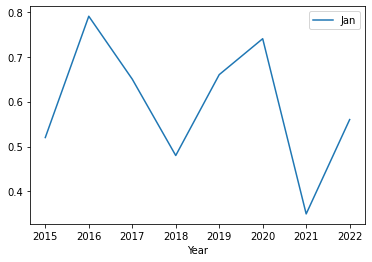

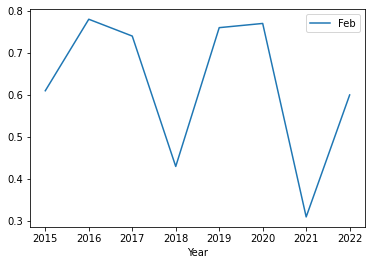

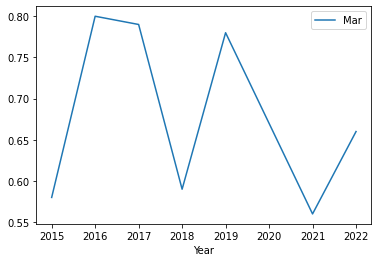

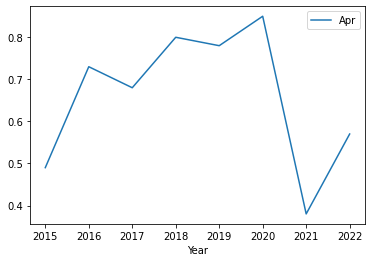

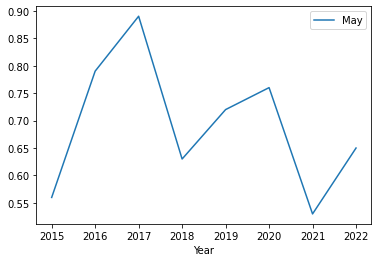

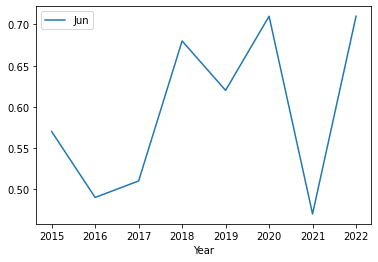

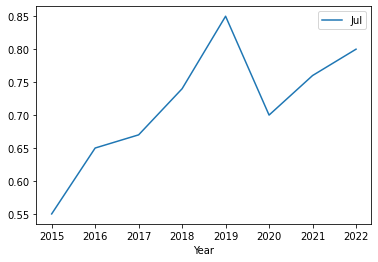

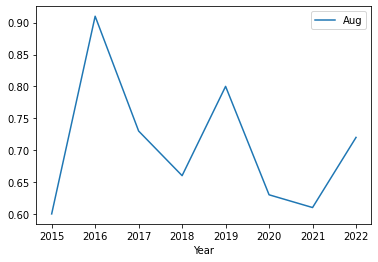

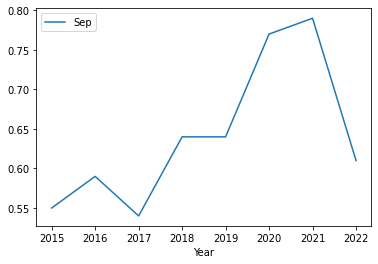

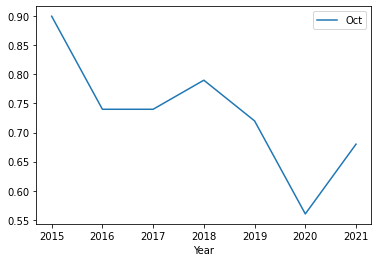

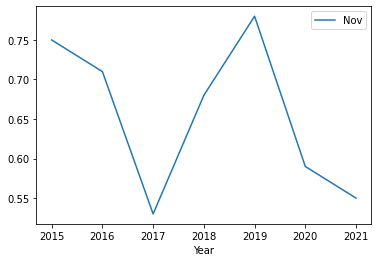

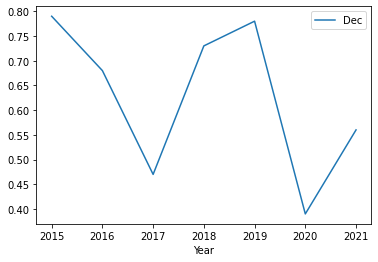

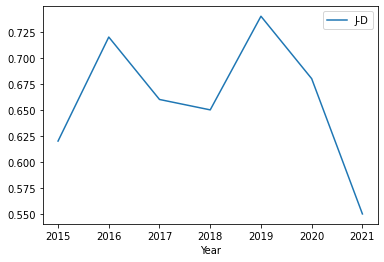

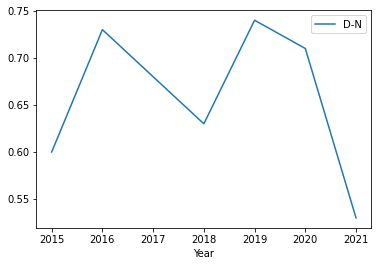

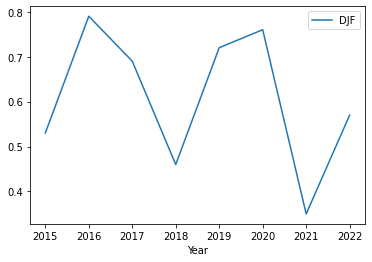

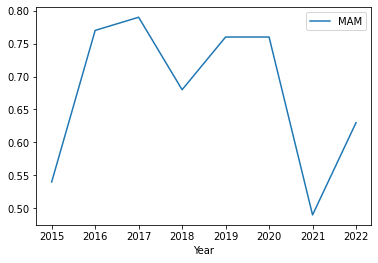

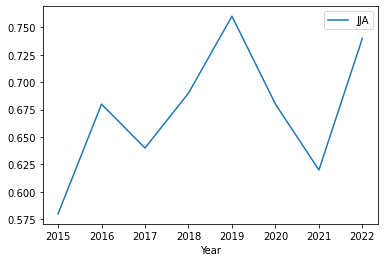

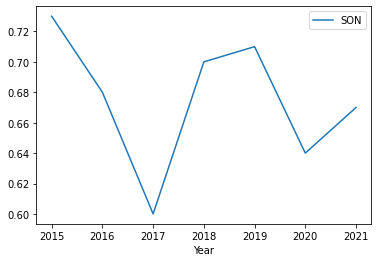

In [18]:
all_graphics(df)

## La même chose avec une droite de régression linéaire


In [46]:
def all_graphics(df, start = None, end = None):
  if not end:
    end = df.iloc[-1,:][0]
  if not start:
    start = df.iloc[0,:][0]
  assert start < end , "L'année de départ doit être inférieure à l'année d'arrivé !"
  index_start = int(start - df.iloc[0,:][0])
  index_end = int(end - df.iloc[0,:][0]) + 1

  dataframes = []

  columns = list(df.columns)
  for column in columns[1:]: # On ne prend pas l'année
    df_temp = pd.DataFrame()
    df_temp['Year'] = df['Year']
    df_temp[column] = df[column]
    dataframes.append(df_temp)
    # selection de la première colonne de notre dataset (l'année)
    X = df_temp.iloc[index_start:index_end,0]
    #selection la colonne de data
    Y = df_temp.iloc[index_start:index_end,1]
    # linregress() renvoie plusieurs variables de retour. On s'interessera 
    # particulierement au slope et intercept
    # parfois ça plante quand des données sont manquantes
    try:
      slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
      lineregress = True
    except:
      print(f"Erreur sur la colonne {column}")
      lineregress = False

    if not lineregress:
      pass
    else:
      # là c'est un peu feinteux de définir une fonction dans une fonction
      # mais c'est pour bénéficier du scope
      def predict(x):  
        return slope * x + intercept
      # le slope peut être à NaN si trop de valeurs sont manquantes
      if str(slope) != "nan":
        #la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
        fitLine = predict(X)
        plt.plot(X, Y, label="donnees") # les points (x, y) representes par des points
        plt.plot(X, fitLine, c='r')
        plt.title(column+"-"+str(start)+"-"+str(end)) # titre de graphique
        plt.savefig("Feb-8.png")
        plt.show()
      else:
        print(f"slope de la colonne {column} à nan")
        # print(X)
        # print(Y)
  return dataframes

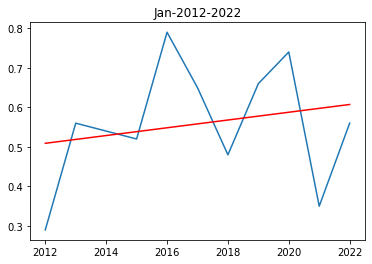

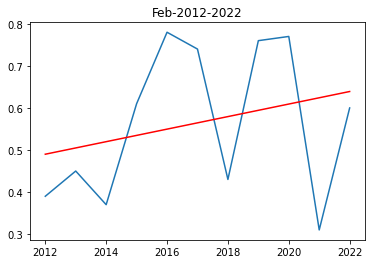

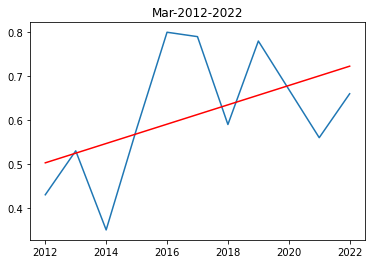

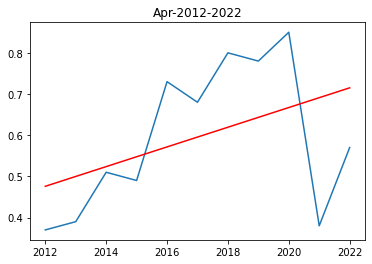

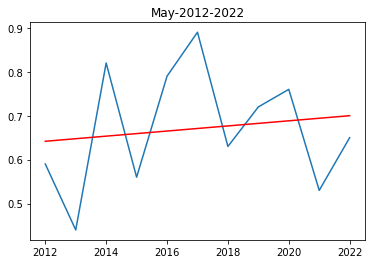

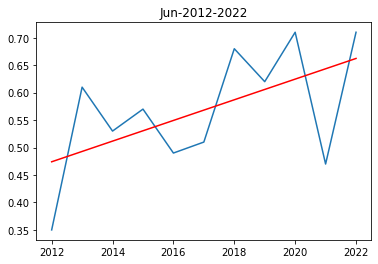

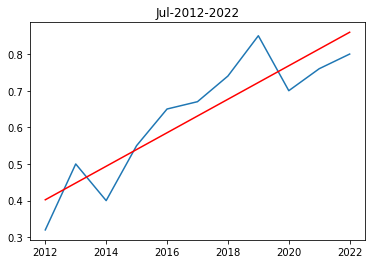

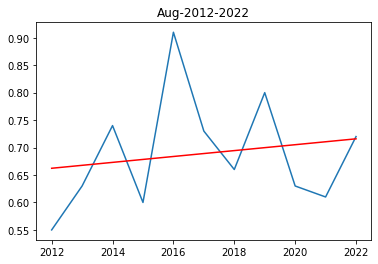

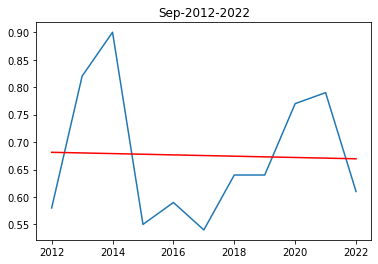

slope de la colonne Oct à nan
slope de la colonne Nov à nan
slope de la colonne Dec à nan
slope de la colonne J-D à nan
slope de la colonne D-N à nan


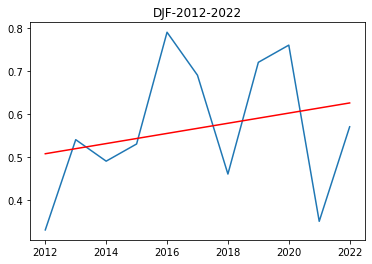

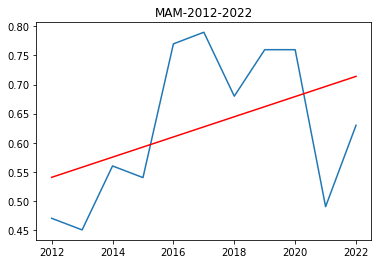

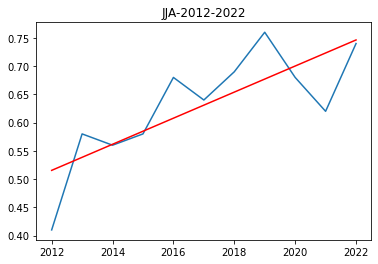

slope de la colonne SON à nan


In [47]:
dataframes = all_graphics(df,start=2012, end=2022)

In [21]:
#plt.plot(X, Y, label="donnees") # les points (x, y) representes par des points
#plt.plot(X, fitLine, c='r')
#plt.title("Juin-Juillet-Aout") # titre de graphique
#plt.savefig("Juin-Juillet-Aout.png")
#files.download("Juin-Juillet-Aout.png")

## CO2

https://gml.noaa.gov/ccgg/trends/gl_data.html

In [22]:
import requests

url_co = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.csv"

In [23]:
r = requests.get(url_co)
r.text

'# --------------------------------------------------------------------\n# USE OF NOAA GML DATA\n#\n# These data are made freely available to the public and the\n# scientific community in the belief that their wide dissemination\n# will lead to greater understanding and new scientific insights.\n# The availability of these data does not constitute publication\n# of the data.  NOAA relies on the ethics and integrity of the user to\n# ensure that GML receives fair credit for their work.  If the data\n# are obtained for potential use in a publication or presentation,\n# GML should be informed at the outset of the nature of this work.\n# If the GML data are essential to the work, or if an important\n# result or conclusion depends on the GML data, co-authorship\n# may be appropriate.  This should be discussed at an early stage in\n# the work.  Manuscripts using the GML data should be sent to GML\n# for review before they are submitted for publication so we can\n# ensure that the quality and

Bon il y a tout un tas de commentaires, mais panda sait gérer tout ça

In [24]:
df_co = pd.read_csv(url_co, comment='#')
df_co.head()

,year,month,decimal,average,average_unc,trend,trend_unc
0,1979,1,1979.042,336.56,0.10,335.92,0.09
1,1979,2,1979.125,337.29,0.09,336.25,0.09
2,1979,3,1979.208,337.88,0.10,336.51,0.09
3,1979,4,1979.292,338.32,0.11,336.72,0.09
4,1979,5,1979.375,338.26,0.04,336.71,0.10


Bon on n'est pas aidés: les données ne sont pas ordonnées pareil !

On va tenter de remédier à tout ça

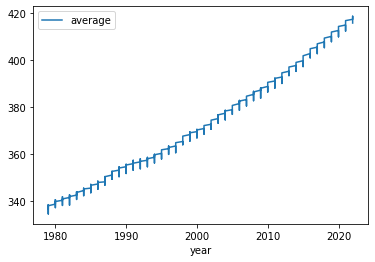

In [25]:
df_co[["year","average"]].plot(x="year",y='average')

In [26]:
nasa_head = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON']

In [27]:
def traitement_co(df):
  dictionnaire = {}
  for cle in nasa_head[:13]:
    dictionnaire[cle]=[]
  for i in df.index:
    if df["year"][i] not in dictionnaire['Year']:
      dictionnaire['Year'].append(int(df["year"][i]))
    dictionnaire[nasa_head[df["month"][i]]].append(int(df["average"][i]))
  

  return dictionnaire

In [28]:
dico = traitement_co(df_co)

Forcément il y aura des valeurs manquantes au moins pour l'année en cours.

In [29]:
def valeurs_manquantes(dico):
  # Ici on suppose qu'au moins le mois de janvier est complet
  # sinon, c'est qu'on n'a pas changé d'année !
  # et on suppose aussi qu'elle ne sont manquantes
  # que pour l'année courante
  max_len = len(dico['Jan'])
  for key, values in dico.items():
    if len(values) < max_len:
      values.append(np.nan)

In [30]:
valeurs_manquantes(dico)

In [31]:
df_co = pd.DataFrame.from_dict(dico)
df_co.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1979,336,337,337,338,338,337,335,334.0,335.0,336.0,337.0,337.0
1,1980,338,339,339,339,340,339,338,337.0,337.0,337.0,338.0,339.0
2,1981,340,340,341,341,341,340,339,338.0,337.0,339.0,340.0,340.0
3,1982,341,341,342,342,342,341,339,338.0,338.0,339.0,340.0,341.0
4,1983,342,342,343,343,343,343,342,340.0,340.0,341.0,342.0,343.0


In [32]:
df_co['Jan'][-10:]

34    395
35    397
36    399
37    402
38    405
39    407
40    409
41    412
42    414
43    417
Name: Jan, dtype: int64

In [33]:
temp = list(df['Jan'][-30:])
co = list(df_co['Jan'][-30:])
dico_combi = {'Jan_Temp': temp, 'Jan_CO':co}
df_combi = pd.DataFrame(dico_combi)


df_combi.head()

,Jan_Temp,Jan_CO
0,0.30,357
1,0.19,358
2,0.30,360
3,0.22,362
4,0.25,363


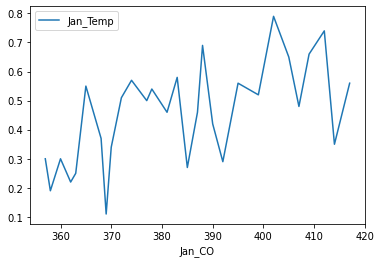

In [34]:

df_combi.plot(x='Jan_CO',y='Jan_Temp')

## Un peu de corrélation

inspiré de l'article suivant: https://ledatascientist.com/correlation-entre-variables/

"Le coefficient de Pearson permet de détecter une corrélation linéaire."

In [35]:
temp = list(df['Jan'][-20:])
co = list(df_co['Jan'][-20:])
r, p = scipy.stats.pearsonr(temp,co)
r, p


(0.24119214623458524, 0.3056388304139726)

d'autres corrélations
https://realpython.com/numpy-scipy-pandas-correlation-python/

In [36]:
scipy.stats.spearmanr(temp, co)

SpearmanrResult(correlation=0.22356054897669714, pvalue=0.34339202435439853)

pas plus de corrélation...

Pour être interprété, le coefficient de corrélation doit être significatif (la valeur de p doit être plus petite que 0,05). Si le coefficient est non significatif, on considère qu’il est semblable à r = 0. 

In [37]:
scipy.stats.kendalltau(temp, co)

KendalltauResult(correlation=0.14324060953744436, pvalue=0.3802791270815382)

c'est pire...